# TP Accéléromètre - Version 3D

### Import des bibliothèques

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Récupération des lignes du fichier

In [8]:
fileName = "./Aller-Retour3D.csv"
file = open(fileName, 'r')
fileLines = list(file)
file.close()


### Extraction des données

In [9]:
t, ax, ay, az = [], [], [], []
vx, vy, vz= [0],[0],[0]
x, y ,z= [0], [0],[0]

for i in range(2, len(fileLines)):
    currentLine = fileLines[i].rstrip()
    data = currentLine.split(";")
    t.append(float(data[0]))
    ax.append(float(data[1]))
    ay.append(float(data[2]))
    az.append(float(data[3]))

### Correction des données en soustrayant la moyenne des données obtenues

In [10]:
meanx = sum(ax)/len(ax)
meany = sum(ay)/len(ay)
meanz = sum(az)/len(az)

for i in range(len(t)):
    ax[i] = ax[i]-meanx
    ay[i] = ay[i]-meany
    az[i] = az[i]-meanz

### Méthode d'Euler : Primitivation de l'accélération puis de la vitesse

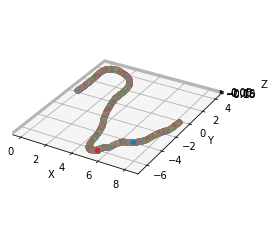

In [11]:
for i in range(1, len(t)):
    vx.append((t[i]-t[i-1])*ax[i]+vx[i-1])
    vy.append((t[i]-t[i-1])*ay[i]+vy[i-1])
    vz.append((t[i]-t[i-1])*az[i]+vz[i-1])

for i in range(1, len(t)):
    x.append((t[i]-t[i-1])*vx[i]+x[i-1])
    y.append((t[i]-t[i-1])*vy[i]+y[i-1])
    z.append((t[i]-t[i-1])*vz[i]+z[i-1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


for i in range(len(x)):
    ax.scatter(x[i], y[i], z[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z))) 

plt.show()

### Calcul de la distance

In [12]:
xmax = max(x)
ymax = max(y)
d = (math.sqrt(xmax**2 + ymax**2))
print(d)

9.332569876912332
